# Moyenne mobile

On veut utiliser des techniques de moyennes mobiles pour déterminer la robustesse et la justesse des périodes de temps que l'on a définies précedemment dans le projet. Pour rappel, ces trois périodes sont : 00-08, 08-12 et 12-16.

<strong>RESUME DES RESULTATS :</strong><br/>
- Basé sur l'étude des volatilités normales (volatilités relatives), on propose comme périodes de temps <strong>00-08, 08-13, 13-16</strong>.
- Nous n'avons pas suffisament de données pour confronter cette segmentation pour les volatilités black/taux d'intérêt.
- Dans la mesure on dans la suite on se concentrera sur les vols black/taux d'intérêt et vol normales, même si les vol implicites brutes semblent plutot proposer <strong>00-08, 08-12 et 12-16</strong>, on gardera <strong>00-08, 08-13, 13-16...</strong>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
var = pd.read_csv('Databases/swaphist.csv', delimiter = ";")
var['Date'] = pd.to_datetime(var['Date'],dayfirst=True) #Conversion sous le bon format de la date.

In [3]:
def movingAverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

La fonction movingAverage permet de calculer la moyenne mobile arithmétique d'une série temporelle <strong>interval</strong>. Le nombre d'échantillon pris en compte dans la moyenne mobile est <strong>window_size</strong>

# Volatilités implicites brutes

On travaille d'abord sur les volatilités implicites brutes.

La moyenne mobile a pour effet de lisser les variations de la série temporelle et de faire ressortir les tendances à moyen et à long terme de la série temporelle.</br>
On regarde la moyenne mobile à 6 mois (en rouge) et à 1 an (vert), tandis que le tracé bleu correspond à la série temporelle brute.</br>
Plusieurs choses ressortent des graphes : 
- La première coupure en <strong>Janvier 2008</strong> est cohérente : on passe d'une phase où les volatilités sont stables et quasi constantes autour de leur moyenne à une phase de croissance linéaire.
- Pour la deuxième période de temps, on a fait le choix de couper en <strong>Janvier 2012</strong>. Ce choix parait pertinent. Le deuxième choix aurait été de couper en <strong>Janvier 2014</strong>, mais les graphes et plus particulèrement les moyennes mobiles montrent que l'amplitude des variations sur la deuxième période est beaucoup plus faible que après 2012 : sur le swaption 1to20, de 2012 à 2014, la volatilité a baissé d'autant que la moitié que ce même swaption a augmenté sur la deuxième période. Cette baisse est de plus brusque et continue.

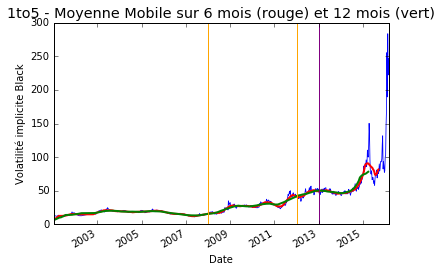

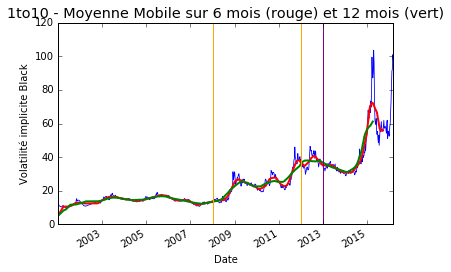

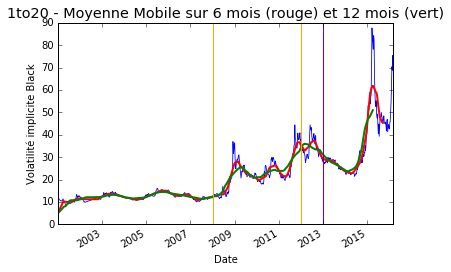

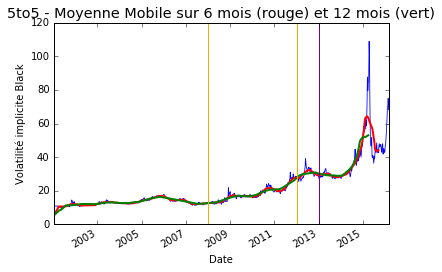

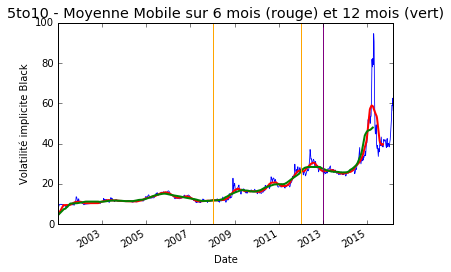

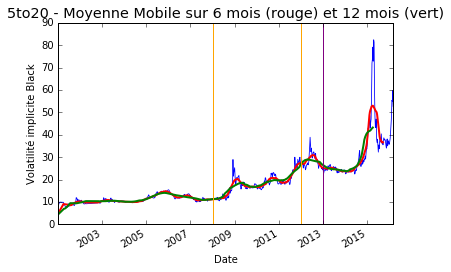

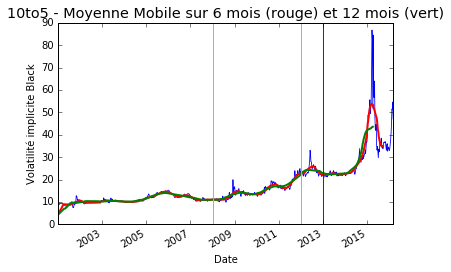

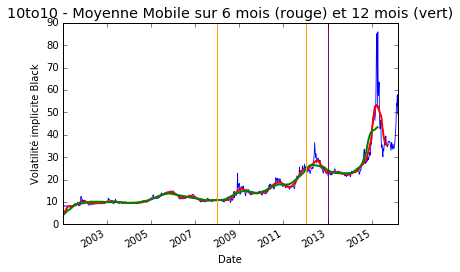

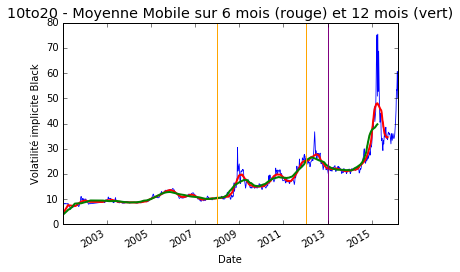

In [4]:
for i, elmt in enumerate(var):
    if i>0:
        fig, ax = plt.subplots()
        ax.plot_date(var['Date'], var[elmt], '-', linewidth=0.8)
        ax.plot_date(var['Date'][:-24], movingAverage(var[elmt], 24)[:-24], '-', color = "red", linewidth=2)
        ax.plot_date(var['Date'][:-48], movingAverage(var[elmt], 48)[:-48], '-', color = "green", linewidth=2)
        #ax.plot_date(var['Date'], movingaverage(var[elmt], 96), '-', color = "red", linewidth=1)
        
        #Titre et légende
        title=str(elmt)+' - Moyenne Mobile sur 6 mois (rouge) et 12 mois (vert)'
        ax.set_title(title, fontsize='x-large')
        ax.set_xlabel('Date')
        ax.set_ylabel('Volatilité implicite Black')
        
        #Le but est confirmer la segmentation des périodes de temps
        plt.axvline('2008-01-03T01:00:00.000000000+0100', color = "orange")
        plt.axvline('2012-01-05T01:00:00.000000000+0100', color = "orange")
        plt.axvline('2013-01-03T01:00:00.000000000+0100', color = "purple")
        
        fig.autofmt_xdate()

# Etude des volatilités normales (variations relatives)

Les régimes de temps sont beaucoup moins évidents. <br/>
Sur la première période, on observe des variations faibles. La première segmentation parait pertinente : on passe à une deuxième période plus soutenue.<br/>
En revanche, pour la deuxième segmentation, on pourrait la retarder à <strong>Janvier 2013</strong>, date à partir de laquelle on observe une période d'acalmie avant un fort rebond de volatilité en 2015. Ainsi redécoupée, les périodes de temps sont plus homogènes.<br/>
Cette dernière coupure (représentée en Violet) n'est plus aussi pertinente pour la série temporelle brute, mais dans la mesure ou l'on se concentrera par la suite sur volatilités normales et les volatilités black/taux d'intérêt, on peut garder cette dernière segmentation.

In [5]:
varRltv = pd.read_csv('Databases/var_relatives.csv', delimiter = ";")
varRltv['Date'] = pd.to_datetime(varRltv['Date'],dayfirst=True) #Conversion sous le bon format de la date.

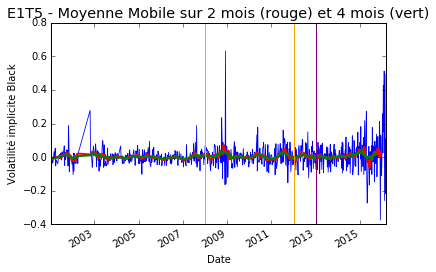

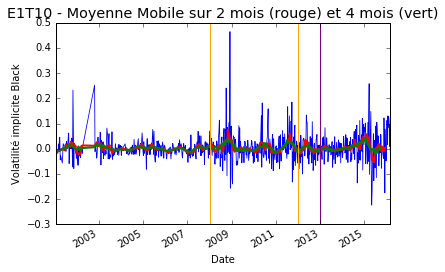

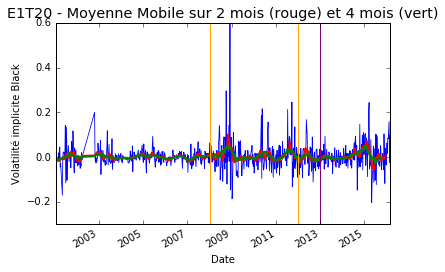

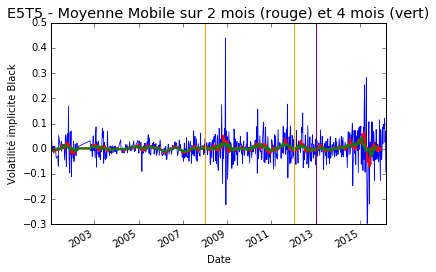

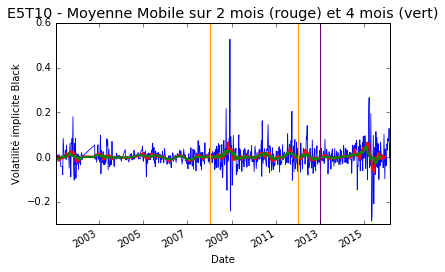

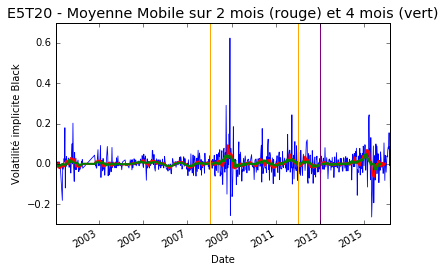

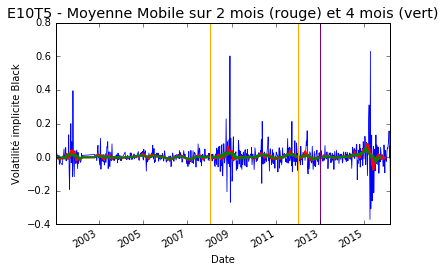

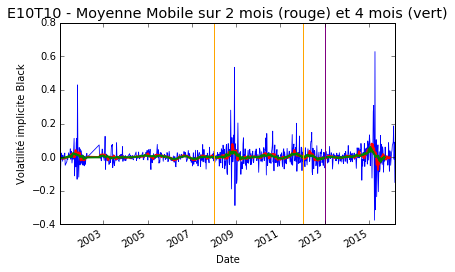

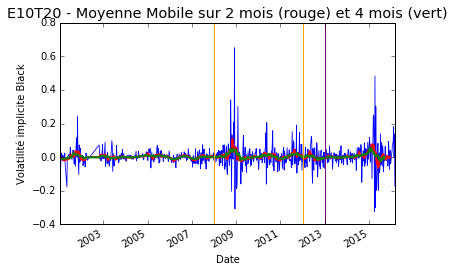

In [6]:
for i, elmt in enumerate(varRltv):
    if i>0:
        fig, ax = plt.subplots()
        ax.plot_date(varRltv['Date'], varRltv[elmt], '-', linewidth=0.8)
        ax.plot_date(varRltv['Date'][:-12], movingAverage(varRltv[elmt], 12)[:-12], '-', color = "red", linewidth=2)
        ax.plot_date(varRltv['Date'][:-24], movingAverage(varRltv[elmt], 24)[:-24], '-', color = "green", linewidth=2)
        
        #Titre et légende
        title=str(elmt)+' - Moyenne Mobile sur 2 mois (rouge) et 4 mois (vert)'
        ax.set_title(title, fontsize='x-large')
        ax.set_xlabel('Date')
        ax.set_ylabel('Volatilité implicite Black')
        
        #Le but est confirmer la segmentation des périodes de temps
        plt.axvline('2008-01-03T01:00:00.000000000+0100', color = "orange")
        plt.axvline('2012-01-05T01:00:00.000000000+0100', color = "orange")
        plt.axvline('2013-01-03T01:00:00.000000000+0100', color = "purple")
        
        fig.autofmt_xdate()

# Etude des volatilités black/taux d'intérêt swaption

Les données du taux swaption que l'on a ne débute qu'en Octobre 2012. On ne peut pas travailler la dessus pour confirmer ou infirmer la segmentation proposée ci-dessus.

In [7]:
varTauxInt = pd.read_csv('Databases/comp_interet.csv', delimiter = ";")
varTauxInt['Date'] = pd.to_datetime(varTauxInt['Date'],dayfirst=True) #Conversion sous le bon format de la date.

In [ ]:
for i, elmt in enumerate(varTauxInt):
    if i>0:
        fig, ax = plt.subplots()
        ax.plot_date(varTauxInt['Date'], varTauxInt[elmt], '-', linewidth=0.8)
        ax.plot_date(varTauxInt['Date'], movingAverage(varTauxInt[elmt], 12), '-', color = "red", linewidth=2)
        ax.plot_date(varTauxInt['Date'], movingAverage(varTauxInt[elmt], 24), '-', color = "green", linewidth=2)
        
        #Titre et légende
        title=str(elmt)+' - Moyenne Mobile sur 2 mois (rouge) et 4 mois (vert)'
        ax.set_title(title, fontsize='x-large')
        ax.set_xlabel('Date')
        ax.set_ylabel('Volatilité implicite Black')
        
        
        fig.autofmt_xdate()